In [1]:
import keras
from keras import layers
from keras.datasets import fashion_mnist
import numpy as np
from sklearn.manifold import TSNE 
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.offsetbox import OffsetImage, AnnotationBbox, TextArea


In [2]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

train_images = train_images.reshape(-1, 28, 28) / 255.0

test_images = test_images.reshape(-1, 28, 28) / 255.0


class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

4422102/4422102 [==============================] - 0s 0us/step


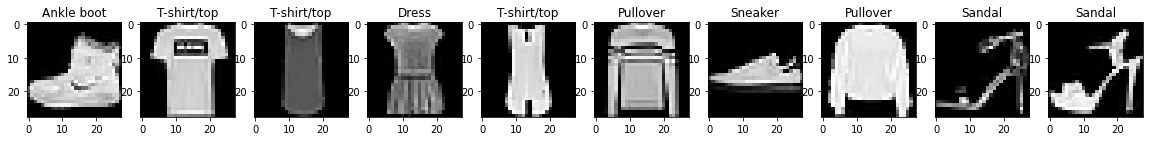

In [3]:
labeldict = {
    0: 'T-shirt/top',
    1: 'Trouser',
    2: 'Pullover',
    3: 'Dress',
    4: 'Coat',
    5: 'Sandal',
    6: 'Shirt',
    7: 'Sneaker',
    8: 'Bag',
    9: 'Ankle boot'
}

fig, ax = plt.subplots(1, 10, figsize=(20, 2))
for i in range(10):
    ax[i].imshow(train_images[i], cmap='gray')
    ax[i].set_title(labeldict[train_labels[i]])

In [4]:
train_images = train_images.reshape((len(train_images), np.prod(train_images.shape[1:])))
test_images = test_images.reshape((len(test_images), np.prod(test_images.shape[1:])))

print(train_images.shape)
print(test_images.shape)

(60000, 784)
(10000, 784)


In [5]:
encoding_dim = 16

input_img = keras.Input(shape=(784,))

encoded = layers.Dense(encoding_dim, activation='relu')(input_img)

decoded = layers.Dense(784, activation='sigmoid')(encoded)

autoencoder = keras.Model(input_img, decoded)


In [6]:
encoder = keras.Model(input_img, encoded)

In [7]:
encoded_input = keras.Input(shape=(encoding_dim,))

decoded_layer = autoencoder.layers[-1]

decoder = keras.Model(encoded_input, decoded_layer(encoded_input))

In [8]:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

autoencoder.fit(train_images, train_images, epochs=10, batch_size=64, shuffle=True, validation_data=(test_images, test_images))

Epoch 1/10
938/938 [==============================] - 8s 4ms/step - loss: 0.3638 - val_loss: 0.3218
Epoch 2/10
938/938 [==============================] - 3s 3ms/step - loss: 0.3105 - val_loss: 0.3068
Epoch 3/10
938/938 [==============================] - 3s 3ms/step - loss: 0.3025 - val_loss: 0.3029
Epoch 4/10
938/938 [==============================] - 3s 3ms/step - loss: 0.3000 - val_loss: 0.3014
Epoch 5/10
938/938 [==============================] - 3s 3ms/step - loss: 0.2989 - val_loss: 0.3005
Epoch 6/10
938/938 [==============================] - 3s 3ms/step - loss: 0.2983 - val_loss: 0.3002
Epoch 7/10
938/938 [==============================] - 5s 5ms/step - loss: 0.2978 - val_loss: 0.2999
Epoch 8/10
938/938 [==============================] - 4s 4ms/step - loss: 0.2975 - val_loss: 0.2995
Epoch 9/10
938/938 [==============================] - 3s 3ms/step - loss: 0.2973 - val_loss: 0.2994
Epoch 10/10
938/938 [==============================] - 3s 3ms/step - loss: 0.2970 - val_loss: 0.2991

In [9]:
encoded_imgs = encoder.predict(test_images)
decoded_imgs = decoder.predict(encoded_imgs)

313/313 [==============================] - 0s 1ms/step


[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 10000 samples in 0.001s...


/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


[t-SNE] Computed neighbors for 10000 samples in 1.935s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 2.684549
[t-SNE] KL divergence after 250 iterations with early exaggeration: 77.793839
[t-SNE] KL divergence after 1000 iterations: 1.452365


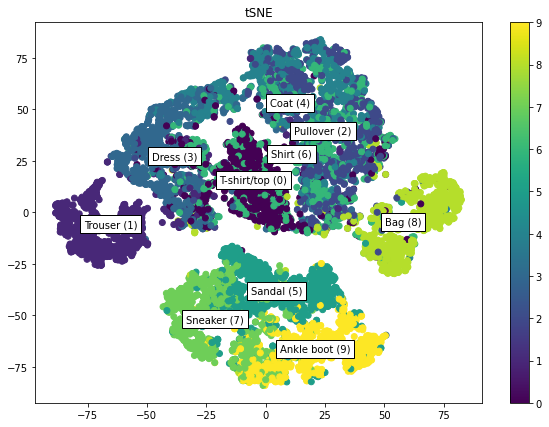

In [10]:
N = 10000

idx = np.random.choice(len(test_images), N)
inputs = encoded_imgs
fig, ax = plt.subplots(figsize=(10, 7))
ax.set_title('tSNE')

coords = TSNE(verbose=True).fit_transform(encoded_imgs)

classes = test_labels
plt.scatter(coords[:, 0], coords[:, 1], c=classes ,cmap=cm.viridis)
plt.colorbar()

for i in range(10):
  class_center = np.mean(coords[classes == i], axis=0)
  text = TextArea('{} ({})'.format(labeldict[i], i))
  ab = AnnotationBbox(text, class_center, xycoords='data', frameon=True)
  ax.add_artist(ab)
  
plt.show()

